# Desafio Alura Store — Análise e Recomendação

## 0) Carregamento dos dados

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tenta 3 fontes: pasta local do repo, diretório atual ou RAW do GitHub oficial
try:
    df1 = pd.read_csv("base-de-dados-challenge-1/loja_1.csv")
    df2 = pd.read_csv("base-de-dados-challenge-1/loja_2.csv")
    df3 = pd.read_csv("base-de-dados-challenge-1/loja_3.csv")
    df4 = pd.read_csv("base-de-dados-challenge-1/loja_4.csv")
except Exception:
    try:
        df1 = pd.read_csv("loja_1.csv"); df2 = pd.read_csv("loja_2.csv"); df3 = pd.read_csv("loja_3.csv"); df4 = pd.read_csv("loja_4.csv")
    except Exception:
        base = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1"
        df1 = pd.read_csv(f"{base}/loja_1.csv")
        df2 = pd.read_csv(f"{base}/loja_2.csv")
        df3 = pd.read_csv(f"{base}/loja_3.csv")
        df4 = pd.read_csv(f"{base}/loja_4.csv")

lojas = {"Loja 1": df1, "Loja 2": df2, "Loja 3": df3, "Loja 4": df4}

COL_PRECO     = "Preço"
COL_CATEGORIA = "Categoria do Produto"
COL_PRODUTO   = "Produto"
COL_FRETE     = "Frete"
COL_AVALIACAO = "Avaliação da compra"

for df in lojas.values():
    for c in [COL_PRECO, COL_FRETE, COL_AVALIACAO]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

for nome, df in lojas.items():
    print(nome, df.shape)
    display(df.head(3))


Loja 1 (2359, 12)


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86


Loja 2 (2359, 12)


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95


Loja 3 (2359, 12)


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79


Loja 4 (2358, 12)


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## 1) Métricas principais

In [2]:

resumo_df = pd.DataFrame({
    "loja": list(lojas.keys()),
    "faturamento_total": [df[COL_PRECO].sum() for df in lojas.values()],
    "media_avaliacao":  [df[COL_AVALIACAO].mean() for df in lojas.values()],
    "frete_medio":      [df[COL_FRETE].mean() for df in lojas.values()]
}).sort_values("faturamento_total", ascending=False)
resumo_df


,loja,faturamento_total,media_avaliacao,frete_medio
0,Loja 1,1534509.12,3.976685,34.691805
1,Loja 2,1488459.06,4.037304,33.621941
2,Loja 3,1464025.03,4.048326,33.074464
3,Loja 4,1384497.58,3.995759,31.278997


### Gráfico 1 — Barras (Faturamento por loja)

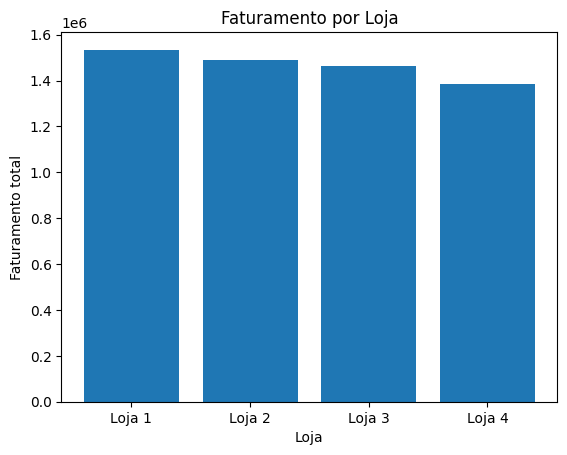

In [3]:

plt.figure()
plt.bar(resumo_df["loja"], resumo_df["faturamento_total"])
plt.title("Faturamento por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento total")
plt.show()


### Gráfico 2 — Pizza (Participação no faturamento)

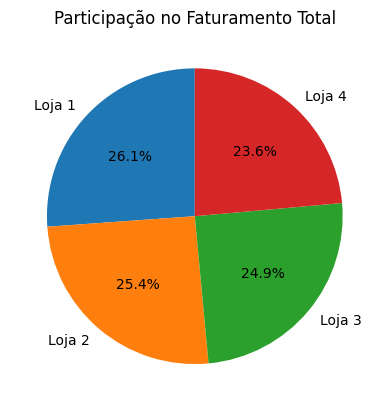

In [4]:

plt.figure()
plt.pie(resumo_df["faturamento_total"], labels=resumo_df["loja"], autopct="%1.1f%%", startangle=90)
plt.title("Participação no Faturamento Total")
plt.show()


## 2) Vendas por categoria (Top 5 por loja)

In [5]:

for nome, df in lojas.items():
    print(f"\n== {nome} | Top 5 categorias ==")
    display(df[COL_CATEGORIA].value_counts().head(5))



== Loja 1 | Top 5 categorias ==


,count
Categoria do Produto,
moveis,465
eletronicos,448
brinquedos,324
eletrodomesticos,312
esporte e lazer,284



== Loja 2 | Top 5 categorias ==


,count
Categoria do Produto,
moveis,442
eletronicos,422
brinquedos,313
eletrodomesticos,305
esporte e lazer,275



== Loja 3 | Top 5 categorias ==


,count
Categoria do Produto,
moveis,499
eletronicos,451
brinquedos,315
eletrodomesticos,278
esporte e lazer,277



== Loja 4 | Top 5 categorias ==


,count
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254


## 3) Média de avaliação por loja

In [6]:

pd.Series({n: df[COL_AVALIACAO].mean() for n, df in lojas.items()}, name="media_avaliacao")


,media_avaliacao
Loja 1,3.976685
Loja 2,4.037304
Loja 3,4.048326
Loja 4,3.995759


## 4) Produtos mais e menos vendidos (Top 5 / Bottom 5)

In [7]:

for nome, df in lojas.items():
    vc = df[COL_PRODUTO].value_counts()
    print(f"\n== {nome} | Top 5 produtos mais vendidos ==")
    display(vc.head(5))
    print(f"== {nome} | 5 menos vendidos ==")
    display(vc.tail(5))



== Loja 1 | Top 5 produtos mais vendidos ==


,count
Produto,
Micro-ondas,60
TV Led UHD 4K,60
Guarda roupas,60
Secadora de roupas,58
Cômoda,56


== Loja 1 | 5 menos vendidos ==


,count
Produto,
Ciência de dados com python,39
Pandeiro,36
Panela de pressão,35
Headset,33
Celular ABXY,33



== Loja 2 | Top 5 produtos mais vendidos ==


,count
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Violão,58
Pandeiro,58


== Loja 2 | 5 menos vendidos ==


,count
Produto,
Fone de ouvido,37
Poltrona,35
Mesa de jantar,34
Impressora,34
Jogo de tabuleiro,32



== Loja 3 | Top 5 produtos mais vendidos ==


,count
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56
Jogo de panelas,55
Cômoda,55


== Loja 3 | 5 menos vendidos ==


,count
Produto,
Guitarra,38
Jogo de copos,36
Mochila,36
Micro-ondas,36
Blocos de montar,35



== Loja 4 | Top 5 produtos mais vendidos ==


,count
Produto,
Cama box,62
Faqueiro,59
Dashboards com Power BI,56
Cama king,56
Carrinho controle remoto,55


== Loja 4 | 5 menos vendidos ==


,count
Produto,
Geladeira,38
Ciência de dados com python,38
Violão,37
Guarda roupas,34
Guitarra,33


## 5) Frete médio por loja + Dispersão Preço×Frete

In [8]:

pd.Series({n: df[COL_FRETE].mean() for n, df in lojas.items()}, name="frete_medio")


,frete_medio
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


### Gráfico 3 — Dispersão Preço×Frete (Loja 1)

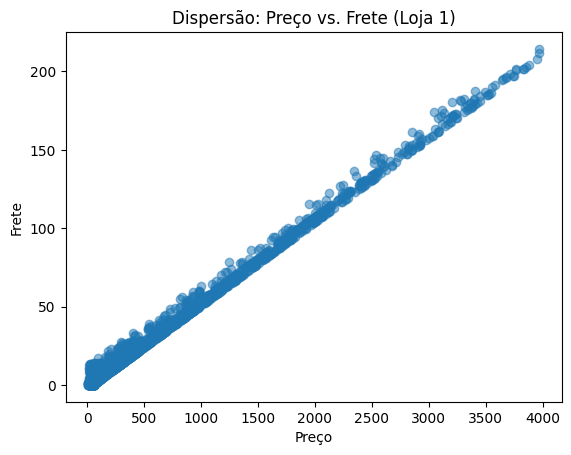

In [9]:

df_exemplo = lojas["Loja 1"]
plt.figure()
plt.scatter(df_exemplo[COL_PRECO], df_exemplo[COL_FRETE], alpha=0.5)
plt.title("Dispersão: Preço vs. Frete (Loja 1)")
plt.xlabel(COL_PRECO); plt.ylabel(COL_FRETE)
plt.show()


## 6) Relatório final

## Relatório Final — Recomendação

**Objetivo:** recomendar qual loja o Sr. João deve vender, com base em faturamento, categorias, avaliações, produtos e frete.

**Principais métricas**
- Loja 1: faturamento R$ 1.534.509,12; avaliação média 3.98; frete médio R$ 34,69
- Loja 2: faturamento R$ 1.488.459,06; avaliação média 4.04; frete médio R$ 33,62
- Loja 3: faturamento R$ 1.464.025,03; avaliação média 4.05; frete médio R$ 33,07
- Loja 4: faturamento R$ 1.384.497,58; avaliação média 4.00; frete médio R$ 31,28

**Categorias mais populares (top 1 por loja)**
- Loja 1: moveis (465 vendas)
- Loja 2: moveis (442 vendas)
- Loja 3: moveis (499 vendas)
- Loja 4: moveis (480 vendas)

**Produtos (exemplos — mais/menos vendidos)**
- Loja 1: mais vendido **TV Led UHD 4K** (60); menos vendido **Celular ABXY** (33)
- Loja 2: mais vendido **Iniciando em programação** (65); menos vendido **Jogo de tabuleiro** (32)
- Loja 3: mais vendido **Kit banquetas** (57); menos vendido **Blocos de montar** (35)
- Loja 4: mais vendido **Cama box** (62); menos vendido **Guitarra** (33)

**Recomendação:** vender a **Loja 1** (menor desempenho relativo considerando faturamento, avaliação e frete).